In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Clean_DataScientistSalary.csv')
df.head()

,Job Title,Salary Estimate,Job Description,Company Name,Location,Size,Founded,Sector,Revenue,Industry,Type,Hourly,job_state,Age,python_yn,R_yn,spark_yn,aws_yn,excel
0,Data Scientist,98847.0,First Orion is seeking a talented Data Scienti...,First Orion\n,"North Little Rock, AR",201 to 500 Employees,2008.0,Information Technology,Unknown / Non-Applicable,Enterprise Software & Network Solutions,Company - Private,0,AR,15.0,1,0,1,0,0
1,Junior Data Scientist,85000.0,"Fremont, California\nType: Full-time\nMin. Exp...",SoundThinking\n,"Fremont, CA",201 to 500 Employees,1996.0,Information Technology,$25 to $100 million (USD),Software Development,Company - Public,0,CA,27.0,1,0,0,1,1
2,College Graduate - Data Science (BS/MS),132410.0,Job Description\n\nIntel is a company of bold ...,INTEL\n,"Santa Clara, CA",10000+ Employees,1968.0,Information Technology,$10+ billion (USD),Computer Hardware Development,Company - Public,0,CA,55.0,0,0,0,1,1
3,Sr Data Analyst,84636.0,Introduction\nDo you want to join an organizat...,HCA Healthcare\n,"Nashville, TN",10000+ Employees,1968.0,Healthcare,$10+ billion (USD),Health Care Services & Hospitals,Company - Public,0,TN,55.0,0,0,0,1,1
4,Data Scientist,138198.0,Requisition ID: 377004\nWork Area: Information...,SAP\n,"Palo Alto, CA",10000+ Employees,1972.0,Information Technology,$10+ billion (USD),Enterprise Software & Network Solutions,Company - Public,0,CA,51.0,1,0,0,0,1


In [3]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' or 'senior' or 'lead' or 'principal' in title.lower():
        return 'senior'
    elif 'jr' or '.jr' or 'junior' in title.lower():
        return 'jr'
    else:
        return 'na'
    

In [5]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [6]:
df.job_simp.value_counts()

data scientist    60
na                14
mle                9
analyst            5
Name: job_simp, dtype: int64

In [7]:
df['seniority'] = df['Job Title'].apply(seniority)

In [8]:
df.seniority.value_counts()

senior    88
Name: seniority, dtype: int64

In [10]:
df['job_state'] = df['job_state'].apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df.job_state.value_counts()

CA        24
Remote     9
NY         9
MA         6
TX         4
MD         3
IL         3
OH         3
OR         3
PA         3
DC         2
CO         2
NJ         2
AR         2
WA         2
AZ         2
TN         2
AL         1
GA         1
FL         1
SC         1
MI         1
IN         1
VA         1
Name: job_state, dtype: int64

In [11]:
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      3823
1      4490
2      4337
3      7432
4      5039
      ...  
83     5257
84     5965
85     5203
86     1062
87    10548
Name: desc_len, Length: 88, dtype: int64

In [12]:
df['Company Name'] = df['Company Name'].apply(lambda x: x.replace('\n' ,''))

In [13]:
df['Company Name']

0                  First Orion
1                SoundThinking
2                        INTEL
3               HCA Healthcare
4                          SAP
                ...           
83                  Salesforce
84               GE Healthcare
85                  CVS Health
86                    Grainger
87    National Security Agency
Name: Company Name, Length: 88, dtype: object

In [14]:
df.describe()

,Salary Estimate,Founded,Hourly,Age,python_yn,R_yn,spark_yn,aws_yn,excel,desc_len
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.0,88.000000,88.000000,88.000000,88.000000
mean,116814.230909,1966.852273,0.034091,56.147727,0.715909,0.0,0.238636,0.420455,0.465909,4911.125000
std,35943.816183,44.201612,0.182503,44.201612,0.453565,0.0,0.428693,0.496461,0.501695,2164.985858
min,24.250000,1860.000000,0.000000,3.000000,0.000000,0.0,0.000000,0.000000,0.000000,1045.000000
25%,99875.000000,1947.250000,0.000000,20.750000,0.000000,0.0,0.000000,0.000000,0.000000,3822.000000
50%,111498.000000,1970.000000,0.000000,53.000000,1.000000,0.0,0.000000,0.000000,0.000000,4819.500000
75%,135657.750000,2002.250000,0.000000,75.750000,1.000000,0.0,0.000000,1.000000,1.000000,5869.500000
max,225000.000000,2020.000000,1.000000,163.000000,1.000000,0.0,1.000000,1.000000,1.000000,10554.000000


<AxesSubplot:>

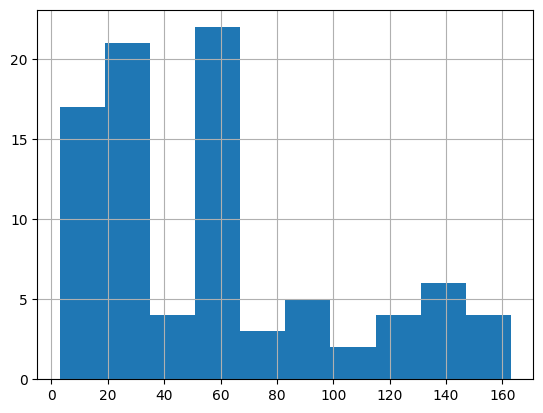

In [15]:
df.Age.hist()

<AxesSubplot:>

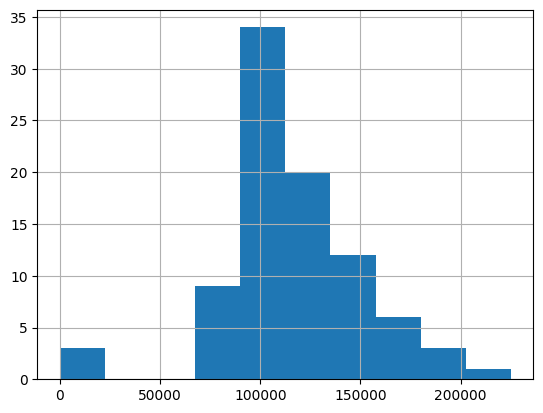

In [16]:
df['Salary Estimate'].hist()

<AxesSubplot:>

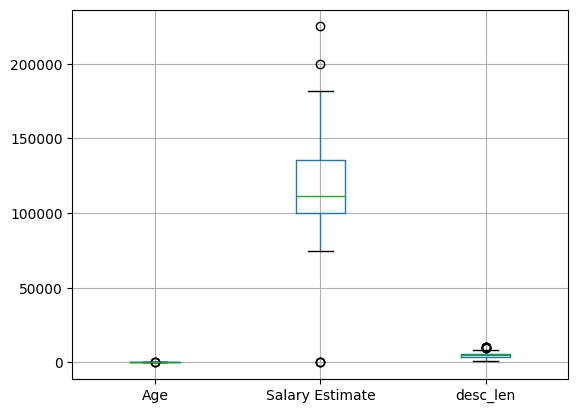

In [17]:
df.boxplot(column = ['Age', 'Salary Estimate', 'desc_len'])

In [18]:
df[['Age', 'Salary Estimate', 'desc_len']].corr()

<bound method DataFrame.corr of       Age  Salary Estimate  desc_len
0    15.0          98847.0      3823
1    27.0          85000.0      4490
2    55.0         132410.0      4337
3    55.0          84636.0      7432
4    51.0         138198.0      5039
..    ...              ...       ...
83   24.0         181889.0      5257
84  131.0         155000.0      5965
85   60.0         105000.0      5203
86   96.0         103649.0      1062
87   61.0         130623.0     10548

[88 rows x 3 columns]>

<AxesSubplot:>

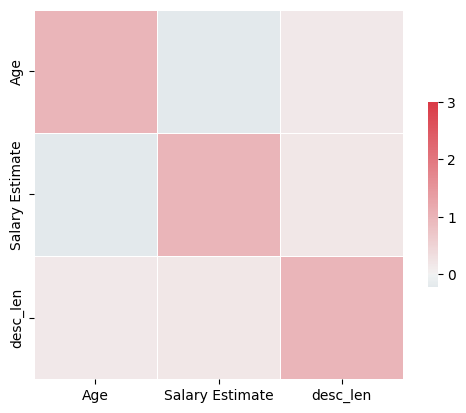

In [24]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['Age', 'Salary Estimate', 'desc_len']].corr(), vmax = 3, center = 0, cmap = cmap, square = True, linewidths = .5, cbar_kws = {"shrink": .5})